<a href="https://colab.research.google.com/github/justice3456/04092025_Churning_Customers/blob/main/Churning_Customers_in_a_Telecoms_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#starting the project
import os
import sklearn
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import pickle

 **Loading The Data and Analysing the Datat**

In [2]:
#setting up google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
#importing the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intro_to_AI/CustomerChurn_dataset.csv')

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#trying to convert total charges to string failed because there are some missing values in total charges.
#the first instance of a missing value is at position '488'
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [5]:
#imputing and converting total charges from object to numeric
data['TotalCharges'] = data['TotalCharges'].fillna(method='ffill')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce', downcast = 'float')

In [6]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [7]:
#there are no other missing values thus there is no need to impute
#customerID is removed because the ID has no importance in predicting customer churn
data.drop('customerID', axis = 1, inplace = True)

In [8]:
#numeric data does not need to be encoded thus, 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges' are not encoded
data_to_encode = data.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#data_to_encode is a part of the dataset that needs to be encoded and the have non numeric datatypes
data_to_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


In [34]:
#creating an function (automation) for encoding a dataframe which returns an encoded dataframe
label_encoder = LabelEncoder()
def AutomaticLabelEncoding(dataframe):
  encoded_columns = pd.DataFrame() #this dataframe is updated with encoded values during every iteration
  for i in dataframe:
    i = str(i)
    label_encoder_ = LabelEncoder()
    encoding = pd.Series(label_encoder.fit_transform(dataframe[i]), name = i)
    encoded_columns[i] = encoding
  return encoded_columns

In [ ]:
#encodind the data
encoded_dataframe = AutomaticLabelEncoding(data_to_encode)


In [89]:
encoded_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   Partner           7043 non-null   int64
 2   Dependents        7043 non-null   int64
 3   PhoneService      7043 non-null   int64
 4   MultipleLines     7043 non-null   int64
 5   InternetService   7043 non-null   int64
 6   OnlineSecurity    7043 non-null   int64
 7   OnlineBackup      7043 non-null   int64
 8   DeviceProtection  7043 non-null   int64
 9   TechSupport       7043 non-null   int64
 10  StreamingTV       7043 non-null   int64
 11  StreamingMovies   7043 non-null   int64
 12  Contract          7043 non-null   int64
 13  PaperlessBilling  7043 non-null   int64
 14  PaymentMethod     7043 non-null   int64
 15  Churn             7043 non-null   int64
dtypes: int64(16)
memory usage: 880.5 KB


In [36]:
path_encoder = '/content/drive/My Drive/Colab Notebooks/Intro_to_AI/Churning_encoder.pkl'
with open(path_encoder, 'wb') as f:
    pickle.dump(label_encoder, f)

In [13]:
#a function that takes two dataframes and concats the second dataframe(datafram_to_add) to the right hand side of the first dataframe(dataframe)
def SimpleConcat(dataframe, dataframe_to_add):
  for i in dataframe_to_add:
    dataframe[str(i)] = dataframe_to_add[str(i)]
  return dataframe

In [14]:
#concatinating the encoded data with the data that did not need encoding
numeric_data = SimpleConcat(encoded_dataframe,data[['SeniorCitizen', 'tenure', 'MonthlyCharges']] )

In [ ]:
#A complete dataframe where all values are numeric as it is a requirement for Machine Learning
numeric_data.info()

In [37]:
#defining dependent and independent columns
y = numeric_data['Churn']
X = numeric_data.drop('Churn', axis = 1)

In [38]:
from sklearn.preprocessing import StandardScaler

In [91]:
# #Scaling independent columns
# Xscaled = StandardScaler().fit_transform(X.copy())
# X = pd.DataFrame(Xscaled, columns = X.columns)

scaler = StandardScaler().fit(X.copy())
X_scaled = scaler.transform(X.copy())
X = pd.DataFrame(X_scaled, columns=X.columns)


In [93]:
#Saving scaler
path_scaler = '/content/drive/My Drive/Colab Notebooks/Intro_to_AI/Churning_scaler1.pkl'
with open(path_scaler, 'wb') as f:
    pickle.dump(scaler, f)

In [23]:
data = pd.concat([X, y], axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**(1) Using a well known method to extract relevant features that relate to chuning**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [26]:
# Create a tree-based model (Random Forest in this example)
model = RandomForestClassifier(n_estimators = 150, random_state = 42)

feature_vetting = RFECV(estimator = model, step = 1, cv = 3, scoring = 'accuracy')
feature_vetting.fit(X_train, y_train)

randomforest_features = X_train.columns[feature_vetting.support_]

In [27]:
#Using correlation to extract relevant features
correlations = numeric_data.corr(numeric_only = True)
correlations['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [28]:
abs_correlations = correlations['Churn'].abs()
selected_features = correlations['Churn'].abs()[correlations['Churn'].abs() > 0.19].index.tolist()
selected_features = [col for col in selected_features if col in randomforest_features]

In [32]:
#selected features
selected_features

['OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'tenure',
 'MonthlyCharges']

**(2) Using EDA to find out which customer profiles relate to EDA a lot**

In [30]:
import seaborn as sns

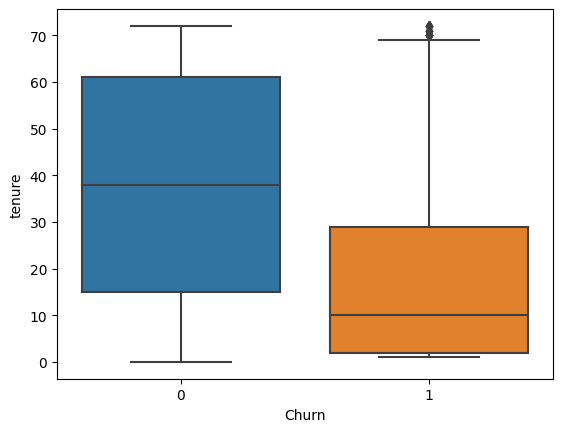

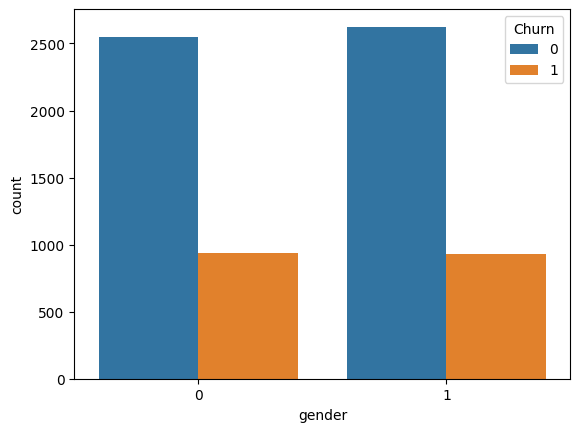

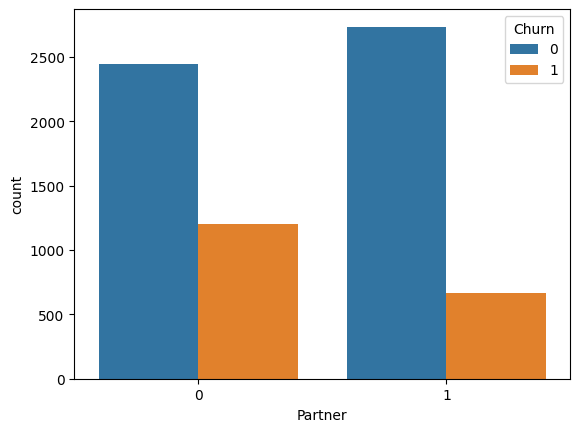

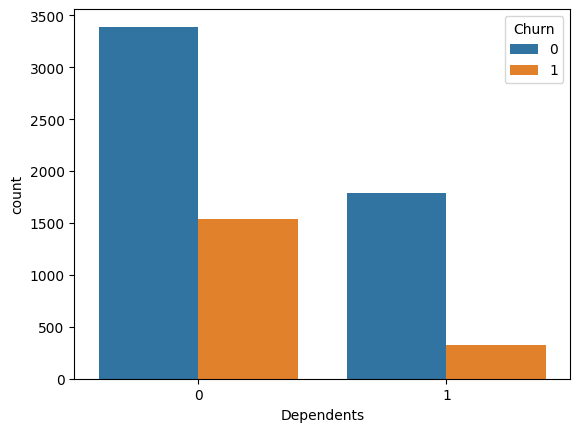

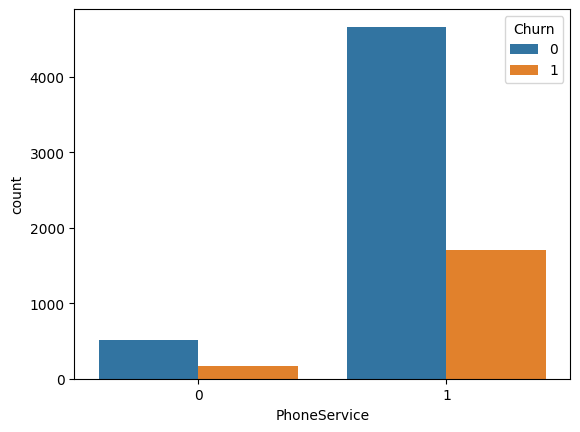

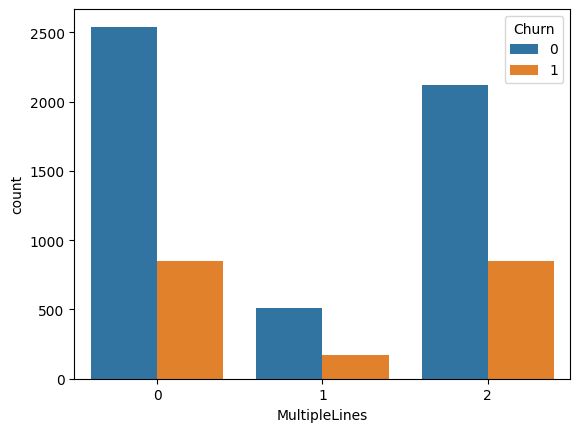

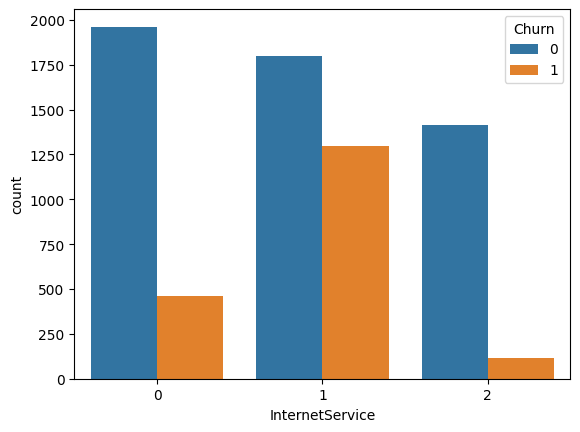

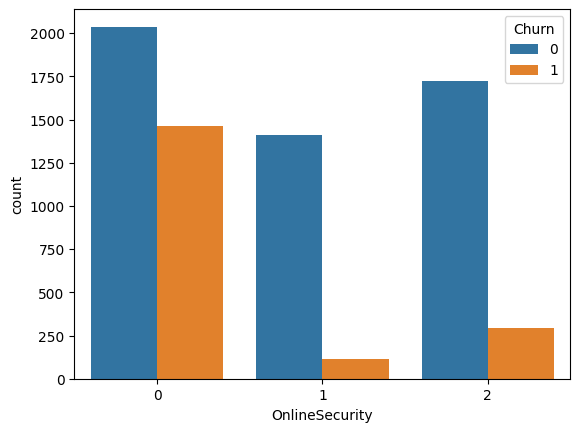

In [33]:
sns.boxplot(x = 'Churn', y ='tenure', data = numeric_data.copy())
plt.show()
print('\n')

for i in range(0,7):
  sns.countplot(x = numeric_data.copy().columns[i], hue='Churn', data = numeric_data.copy())
  plt.show()
  print('\n')

In [41]:
#splitting the dataset again to since the dataset has been updated to relevant features and the outcome
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

**(3) Using the features in (1) to define and train a Multi-Layer Perceptron model using the Functional API**

In [43]:
#Functional API
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(200, activation='relu')(input_layer)
hidden_layer_2 = Dense(130, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(87, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(25, activation='relu')(hidden_layer_3)
hidden_layer_5 = Dense(10, activation='relu')(hidden_layer_4)
# Define the output layer for binary classification
output_layer = Dense(1, activation='sigmoid')(hidden_layer_5)

In [44]:
#Model
model = Model(inputs = input_layer, outputs = output_layer)

In [45]:
#Optimizing the model
model.compile(optimizer = Adam(learning_rate = 0.00001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_returned = model.fit(X_train, y_train, epochs = 12, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/12
564/564 [==============================] - 3s 3ms/step - loss: 0.6860 - accuracy: 0.6374 - val_loss: 0.6729 - val_accuracy: 0.7757
Epoch 2/12
564/564 [==============================] - 2s 3ms/step - loss: 0.6562 - accuracy: 0.7829 - val_loss: 0.6313 - val_accuracy: 0.7906
Epoch 3/12
564/564 [==============================] - 1s 2ms/step - loss: 0.6009 - accuracy: 0.7847 - val_loss: 0.5599 - val_accuracy: 0.7871
Epoch 4/12
564/564 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7787 - val_loss: 0.4898 - val_accuracy: 0.7892
Epoch 5/12
564/564 [==============================] - 1s 2ms/step - loss: 0.4782 - accuracy: 0.7801 - val_loss: 0.4532 - val_accuracy: 0.7878
Epoch 6/12
564/564 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7852 - val_loss: 0.4382 - val_accuracy: 0.7991
Epoch 7/12
564/564 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.7922 - val_loss: 0.4307 - val_accuracy: 0.8006
Epoch 

**Evaluate the model’s accuracy and calculate the AUC score**

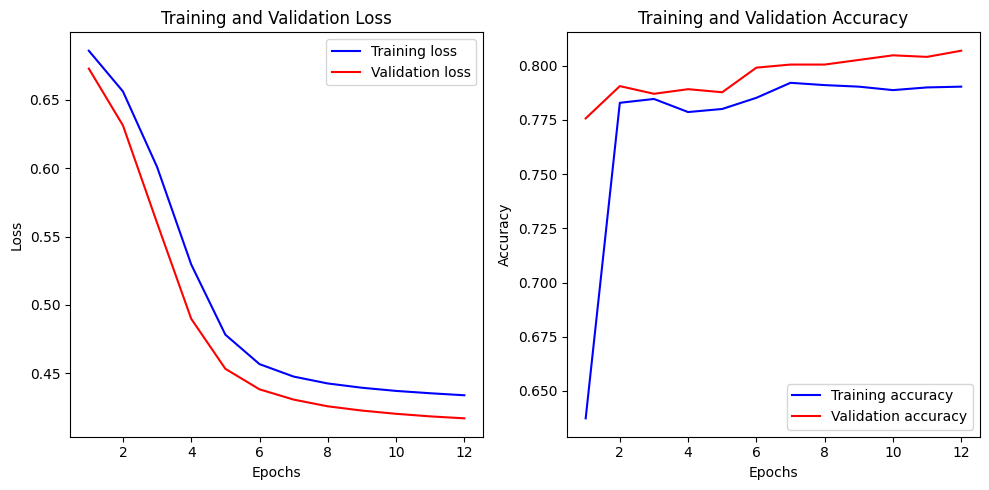

In [46]:
# Plotting training and validation loss across epochs
train_loss = model_returned.history['loss']
val_loss = model_returned.history['val_loss']
train_acc = model_returned.history['accuracy']
val_acc = model_returned.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy across epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Evaluating the model’s accuracy, calculating the AUC score**

In [ ]:
val, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7934


79.33972477912903

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8041
Test Loss: 0.4220
Test Accuracy: 80.4116


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.4f}')

45/45 [==============================] - 1s 5ms/step
AUC Score: 0.8465


**Training an MLP using features from (1) with cross validation and GridSearchCV**

In [ ]:
mlp_crossvalidation = MLPClassifier(max_iter = 100, hidden_layer_sizes = (50,))

# Perform cross-validation
scores = cross_val_score(mlp_crossvalidation, X, y, cv = 5, scoring = 'accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.8133428  0.80056778 0.78992193 0.80752841 0.80255682]
Average accuracy: 0.8027835465191302


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Define the MLPClassifier
mlp_gridsearch = MLPClassifier(max_iter = 100)

# Define the parameter grid to explore different hyperparameters
parameter_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'batch_size': [10,32,64],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Using GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(mlp_gridsearch, parameter_grid, cv = 5, scoring = 'accuracy', verbose = 1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'batch_size': 64, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Test Accuracy: 0.8097941802696949


**Optimiseing the model, training and testing again**

In [94]:
model_returned = model.fit(X_train, y_train, epochs = 12, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/12
89/89 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7923 - val_loss: 0.4143 - val_accuracy: 0.8077
Epoch 2/12
89/89 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.7922 - val_loss: 0.4141 - val_accuracy: 0.8077
Epoch 3/12
89/89 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.7929 - val_loss: 0.4138 - val_accuracy: 0.8070
Epoch 4/12
89/89 [==============================] - 0s 4ms/step - loss: 0.4297 - accuracy: 0.7936 - val_loss: 0.4136 - val_accuracy: 0.8070
Epoch 5/12
89/89 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.7938 - val_loss: 0.4134 - val_accuracy: 0.8077
Epoch 6/12
89/89 [==============================] - 0s 4ms/step - loss: 0.4293 - accuracy: 0.7927 - val_loss: 0.4132 - val_accuracy: 0.8062
Epoch 7/12
89/89 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.7930 - val_loss: 0.4129 - val_accuracy: 0.8055
Epoch 8/12
89/89 [==

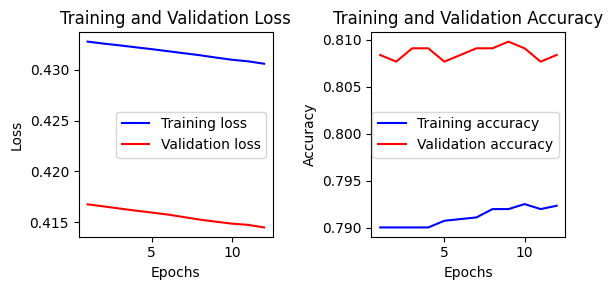

In [48]:
# Plotting training and validation loss across epochs
train_loss = model_returned.history['loss']
val_loss = model_returned.history['val_loss']
train_acc = model_returned.history['accuracy']
val_acc = model_returned.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy across epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
val, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7927


79.26872372627258

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8084
Test Loss: 0.4145
Test Accuracy: 80.8375


In [51]:
y_pred_proba = model.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.4f}')

45/45 [==============================] - 0s 1ms/step
AUC Score: 0.8491


**Saving the model**

In [95]:
path_model = '/content/drive/My Drive/Colab Notebooks/Intro_to_AI/Churning_model1.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(model_returned, f)